In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Sakinah\Downloads\energydata_complete.csv")

In [2]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
#Fitting a linear model where x=T2 and y=T6
simple_linear_reg_df=df[['T2', 'T6']].sample(15, random_state=2)

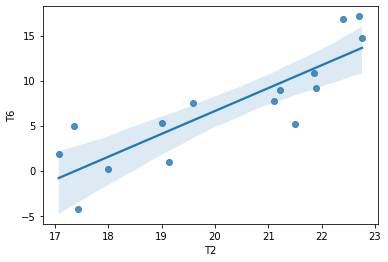

In [4]:
#regression plot
import seaborn as sns
sns.regplot(x="T2", y="T6", data=simple_linear_reg_df)

In [5]:
#determining the r-squared value
import numpy as np
from sklearn.linear_model import LinearRegression

In [6]:
x = np.array([17, 18, 19, 20, 21]).reshape((-1, 1))
y = np.array([-5, 0, 5, 10, 15])

In [7]:
print(x)

[[17]
 [18]
 [19]
 [20]
 [21]]


In [8]:
print(y)

[-5  0  5 10 15]


In [9]:
model = LinearRegression().fit(x, y)

In [10]:
r_sq = model.score(x, y)
>>> print('coefficient of determination:', r_sq)

coefficient of determination: 1.0


In [11]:
# dropping the date column
df.drop(['date'], axis=1,inplace=True)
# dropping the light column 
df.drop(['lights'], axis=1, inplace=True)

In [12]:
#normalising dataset using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
target = normalised_df['Appliances']
features_df = normalised_df.drop(columns=['Appliances'])

In [13]:
#Now, split dataset into the training and testing dataset. 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df,target, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [14]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2) 

0.05

In [15]:
#Residual sum of squares(RSS)
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2) 

45.35

In [16]:
##Root mean square error
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [17]:
#coefficient of determination
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, predicted_values)
round(r2_score,2)

0.15

In [18]:
#return weight of every feature
#define ridge_reg
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

#define lasso_reg

from sklearn.linear_model import Ridge
lasso_reg = Ridge(alpha=0.001)
lasso_reg.fit(x_train, y_train)
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
print(final_weights)

       Features  Linear_Model_Weight  Ridge_Weight  Lasso_weight
0          RH_2            -0.456698     -0.401134     -0.456570
1         T_out            -0.321860     -0.250765     -0.321674
2            T2            -0.236178     -0.193880     -0.236080
3            T9            -0.189941     -0.188584     -0.189939
4          RH_8            -0.157595     -0.156596     -0.157594
5        RH_out            -0.077671     -0.050541     -0.077597
6          RH_7            -0.044614     -0.046291     -0.044617
7          RH_9            -0.039800     -0.041701     -0.039805
8            T5            -0.015657     -0.020727     -0.015669
9            T1            -0.003281     -0.021549     -0.003325
10          rv1             0.000770      0.000743      0.000770
11          rv2             0.000770      0.000743      0.000770
12  Press_mm_hg             0.006839      0.006516      0.006839
13           T7             0.010319      0.010021      0.010318
14   Visibility          

In [19]:
#Train a ridge regression model
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)


0.088

In [20]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
predicted_values = lasso_reg.predict(x_test)

from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.094